In [1]:
import requests  
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#URL = "https://data.police.uk/api/crimes-street/bicycle-theft?poly=52.268,0.543:52.794,0.238:52.130,0.478"
lon1=-7.6025
lat1=57.8681
lon2=1.1865
lat2=58.3556
lon3=1.8017
lat3=51.3443
lon4=-6.2841
lat4=49.9794
# for year in range(2017,2021):
#     for month in range(1,13):
#         URL = "https://data.police.uk/api/crimes-street/bicycle-theft?poly={lat1},{lon1}:{lat2},{lon2}:{lat3},{lon3}&date={year}-{month}" \
#                 .format(year=year,month=str(month).zfill(2),lat1=lat1,lon1=lon1,lat2=lat2,lon2=lon2,lat3=lat3,lon3=lon3,lat4=lat4,lon4=lon4)
#         r = requests.get(url = URL)#, params = PARAMS) 
#         if r.status_code != 404:
# #             with open("bike_thefts-{year}-{month}.json".format(year=year,month=str(month)), "w") as out_json:
# #                 out_json.write(str(r.json()))
#             if len(r.json()) > 0:
#                 print("{year}-{month} has {num} bicycle thefts".format(year=year,month=str(month).zfill(2),num=len(r.json())))
#         else:
#             print("No data for {year}-{month}".format(year=year,month=str(month).zfill(2)))
#         #if len(r.json()) > 0:
        



In [10]:
URL = "https://data.police.uk/api/crimes-street/bicycle-theft?poly={lat1},{lon1}:{lat2},{lon2}:{lat3},{lon3}:{lat4},{lon4}&date=2018-07" \
        .format(lat1=lat1,lon1=lon1,lat2=lat2,lon2=lon2,lat3=lat3,lon3=lon3,lat4=lat4,lon4=lon4)
r = requests.get(url = URL)
data = r.json()
bicycles_df=pd.json_normalize(data)
bicycles_df=bicycles_df[["month","location.latitude","location.longitude","location.street.name","outcome_status.category","outcome_status.date"]]
bicycles_df.count()

month                      9874
location.latitude          9874
location.longitude         9874
location.street.name       9874
outcome_status.category    9874
outcome_status.date        9874
dtype: int64

In [11]:
borough_gdf = gpd.read_file("data/borderlines_uk_data/bdline_gb.gpkg", layer="district_borough_unitary")
borough_gdf.count()

Name                         368
Area_Code                    368
Area_Description             368
File_Name                    368
Feature_Serial_Number        368
Collection_Serial_Number     368
Global_Polygon_ID            368
Admin_Unit_ID                368
Census_Code                  368
Hectares                     368
Non_Inland_Area              368
Area_Type_Code               368
Area_Type_Description        368
Non_Area_Type_Code             0
Non_Area_Type_Description      0
geometry                     368
dtype: int64

In [12]:
bicycles_df["location.latitude"] = bicycles_df["location.latitude"].astype(float)
bicycles_df["location.longitude"] = bicycles_df["location.longitude"].astype(float)
bicycles_gdf = gpd.GeoDataFrame(bicycles_df, geometry=gpd.points_from_xy(bicycles_df["location.longitude"], bicycles_df["location.latitude"]),crs=4326)
bicycles_gdf.crs
bicycles_gdf = bicycles_gdf.to_crs(epsg=27700)
map_df = gpd.sjoin(bicycles_gdf, borough_gdf, how="left", op='within')
map_df.head()

month  location.latitude  location.longitude  \
0  2018-07          54.067618           -2.847064   
1  2018-07          51.875995           -2.247128   
2  2018-07          54.568374           -1.340048   
3  2018-07          54.568374           -1.340048   
4  2018-07          51.857075           -2.226769   

                location.street.name  \
0  On or near Sports/recreation Area   
1         On or near Longhorn Avenue   
2         On or near Grenadier Close   
3         On or near Grenadier Close   
4     On or near Bishop's Castle Way   

                         outcome_status.category outcome_status.date  \
0  Investigation complete; no suspect identified             2018-11   
1                    Unable to prosecute suspect             2018-09   
2                    Unable to prosecute suspect             2018-09   
3  Investigation complete; no suspect identified             2018-09   
4  Investigation complete; no suspect identified             2018-09   

                        geometry  index_right                     Name  \
0  POINT (344662.020 463851.999)        300.0   Lancaster District (B)   
1  POINT (383083.982 219742.950)        167.0  Gloucester District (B)   
2  POINT (442766.970 519439.022)         59.0     Stockton-on-Tees (B)   
3  POINT (442766.970 519439.022)         59.0     Stockton-on-Tees (B)   
4  POINT (384478.977 217634.038)        167.0  Gloucester District (B)   

  Area_Code  ... Collection_Serial_Number Global_Polygon_ID  Admin_Unit_ID  \
0       DIS  ...                    301.0          121923.0         4925.0   
1       DIS  ...                    168.0           57524.0        20391.0   
2       UTA  ...                     60.0           71582.0        25587.0   
3       UTA  ...                     60.0           71582.0        25587.0   
4       DIS  ...                    168.0           57524.0        20391.0   

   Census_Code   Hectares  Non_Inland_Area Area_Type_Code  \
0    E07000121  65402.693         8709.100             AA   
1    E07000081   4082.663           27.354             AA   
2    E06000004  20973.081          479.786             AA   
3    E06000004  20973.081          479.786             AA   
4    E07000081   4082.663           27.354             AA   

       Area_Type_Description  Non_Area_Type_Code Non_Area_Type_Description  
0  CIVIL ADMINISTRATION AREA                None                      None  
1  CIVIL ADMINISTRATION AREA                None                      None  
2  CIVIL ADMINISTRATION AREA                None                      None  
3  CIVIL ADMINISTRATION AREA                None                      None  
4  CIVIL ADMINISTRATION AREA                None                      None  

[5 rows x 23 columns]

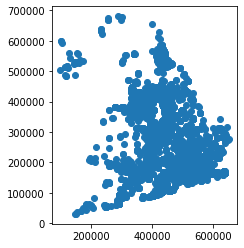

In [13]:
bicycles_gdf.plot()

In [15]:
#Select "Name", count("Name") from Table GROUP BY "NAME"
#map_df[['Name']].groupby('Name').count()
map_df['Name_count']=map_df['Name']
grouped = map_df.groupby('Name',as_index=False)[['Name_count']].count().fillna(0)
#print(type(grouped['Name_count'].max().astype(float)))


#borough_gdf['Count'] = names['Name_count']
#borough_gdf[borough_gdf['Name']=='Ashfield District']
#merged = pd.merge(borough_gdf, grouped, on="Name",how="outer")
merged = borough_gdf.merge(grouped, on="Name",how="outer")
#merged["Name_count"] = merged["Name_count"].astype(float)
#merged["Name_count"] = merged['Name_count'].fillna(0)
#merged.isna()



In [16]:
grouped[grouped["Name"] == "Cambridge District (B)"]
merged[merged["Name"] == "Cambridge District (B)"]

Name Area_Code Area_Description              File_Name  \
151  Cambridge District (B)       DIS         District  CAMBRIDGESHIRE_COUNTY   

     Feature_Serial_Number  Collection_Serial_Number  Global_Polygon_ID  \
151                    152                       152              41655   

     Admin_Unit_ID Census_Code  Hectares  Non_Inland_Area Area_Type_Code  \
151           1255   E07000008  4069.879              0.0             AA   

         Area_Type_Description Non_Area_Type_Code Non_Area_Type_Description  \
151  CIVIL ADMINISTRATION AREA               None                      None   

                                              geometry  Name_count  
151  MULTIPOLYGON (((543659.100 254637.200, 543657....       331.0

Text(0.5, 1, 'Where bikes get stolen')

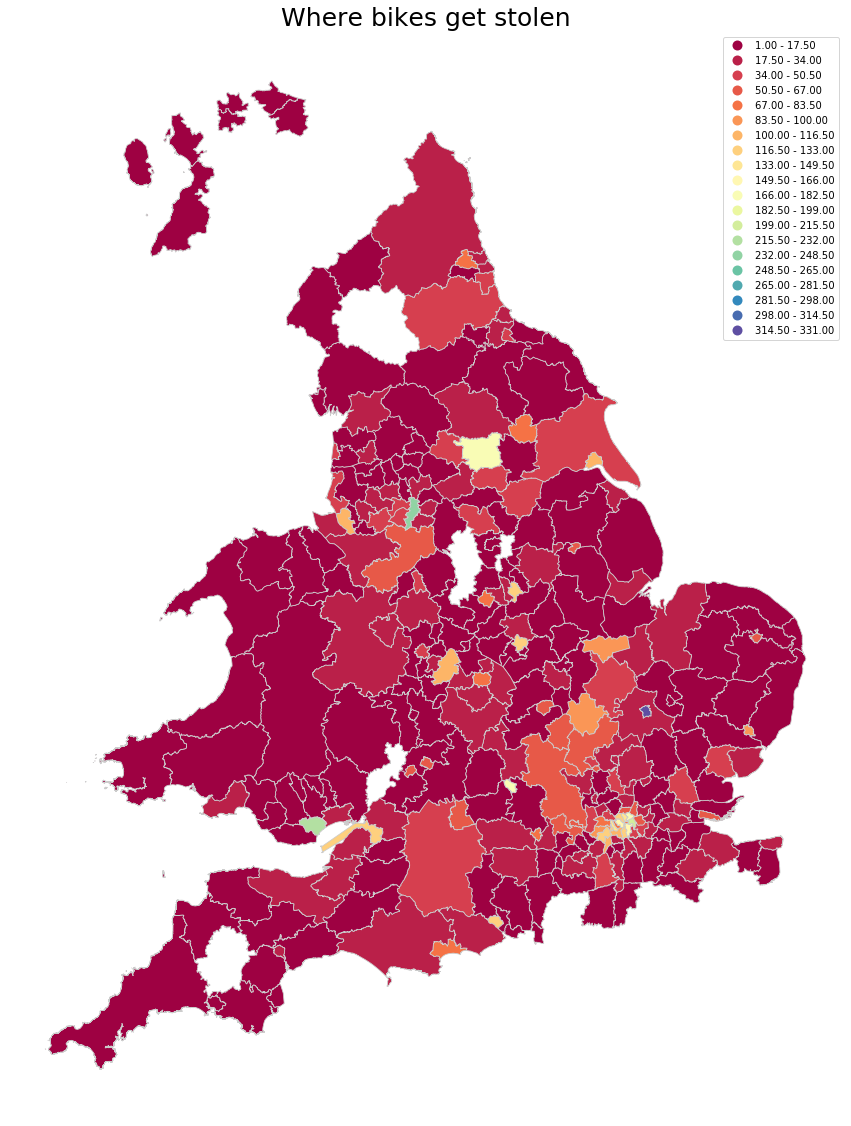

In [20]:
vmin,vmax = 0, grouped['Name_count'].max()
fig,ax = plt.subplots(1,figsize=(30,20))
#,scheme='equal_interval', k=9 , legend=True
merged.plot(column = 'Name_count',cmap='Spectral', linewidth=0.8, ax=ax, edgecolor='0.8',scheme='equal_interval', k=20 , legend=True)
# remove the axis
ax.axis('off')
# add a title
ax.set_title('Where bikes get stolen', fontdict={'fontsize': '25', 'fontweight' : '3'})

# Create colorbar as a legend
#sm = plt.cm.ScalarMappable(cmap='coolwarm', norm=plt.Normalize(vmin=vmin, vmax=vmax))
# empty array for the data range
#sm._A = []
# add the colorbar to the figure
#cbar = fig.colorbar(sm)
#saving our map as .png file.
#fig.savefig(‘map_export.png’, dpi=300)
